In [58]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [59]:
img = cv2.imread('diseasePrediction/test_data/AppleCedarRust2.jpg')

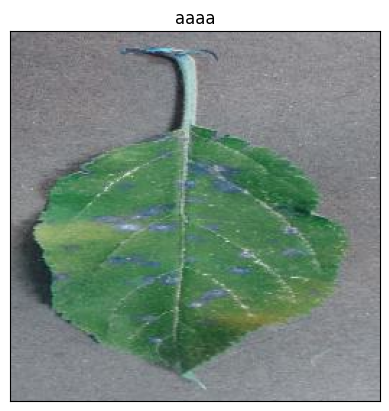

In [60]:
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('aaaa')
plt.show()

In [61]:
def show(org, new):
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(org)
    axs[0].set_title('orgImg')
    axs[1].imshow(new)
    axs[1].set_title('newImg')

    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()


def show1G(org, new):
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(org)
    axs[0].set_title('orgImg')
    axs[1].imshow(new, cmap='Greys')
    axs[1].set_title('newImg')

    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()


def show2G(org, new):
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(org, cmap='Greys')
    axs[0].set_title('orgImg')
    axs[1].imshow(new, cmap='Greys')
    axs[1].set_title('newImg')

    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()

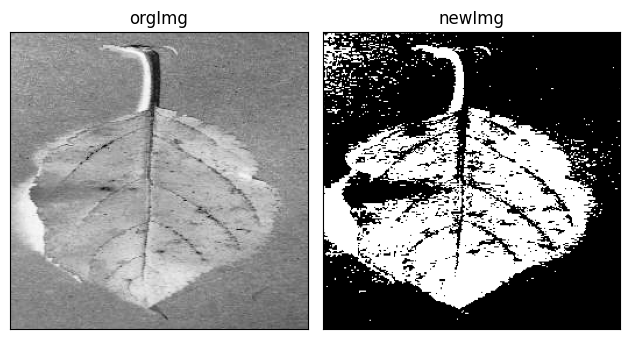

In [72]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(grey, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

show2G(grey, thresh)

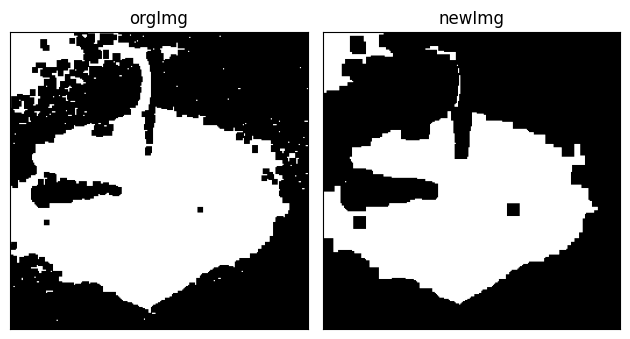

In [74]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
# closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)

show2G(opening, sure_bg)

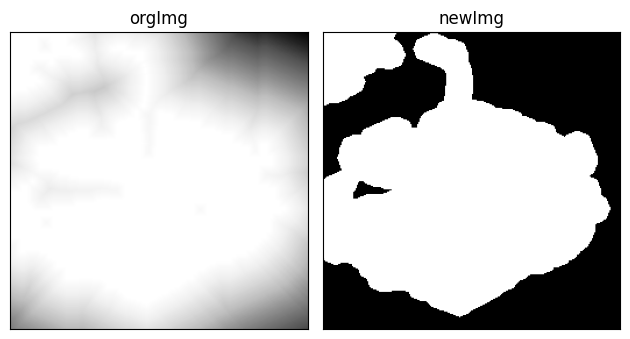

In [75]:
dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 3)
ret, sure_fg = cv2.threshold(dist_transform, 0.1*dist_transform.max(), 255, 0)

show2G(dist_transform, sure_fg)

In [76]:
# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

In [ ]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(211),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(thresh, 'gray')
plt.imsave(r'thresh.png',thresh)
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

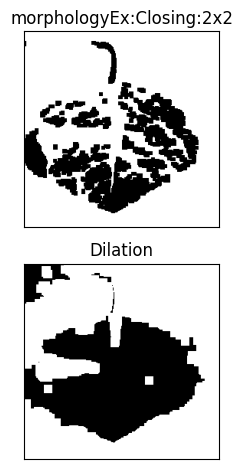

In [56]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.subplot(211), plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(212), plt.imshow(sure_bg, 'gray')
plt.imsave(r'dilation.png', sure_bg)
plt.title("Dilation"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

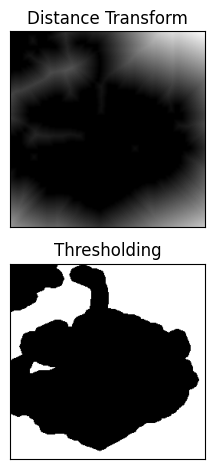

In [57]:
plt.subplot(211),plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(sure_fg, 'gray')
plt.title("Thresholding"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()